In [1]:
# all tensorflow api is accessible through this
import tensorflow as tf
# to visualize the resutls
import matplotlib.pyplot as plt
# 70k mnist dataset that comes with the tensorflow container 
from tensorflow.examples.tutorials.mnist import input_data
tf.set_random_seed(0)

In [2]:
# load data, 60K trainset and 10K testset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# 1. Define Variables and Placeholders
X = tf.placeholder(tf.float32, [None, 784])
Y_ = tf.placeholder(tf.float32, [None, 10])
x_image = tf.reshape(X, [-1,28,28,1])

# Convolutional layer 1
#4-output channels, that is 4 patches 5x5 over 1 channel
# stride (batch=1,x,y,depth=1), don't skip batches nor channels
W1 = tf.Variable(tf.truncated_normal([5, 5, 1, 4], stddev=0.1))
B1 = tf.Variable(tf.constant(0.1, shape=[4]))
Y1 = tf.nn.relu(tf.nn.conv2d(x_image, W1, strides=[1, 1, 1, 1], padding='SAME') + B1)

# Convolutional layer 2
W2 = tf.Variable(tf.truncated_normal([5, 5, 4, 8], stddev=0.1))
B2 = tf.Variable(tf.constant(0.1, shape=[8]))
Y2 = tf.nn.relu(tf.nn.conv2d(Y1, W2, strides=[1, 2, 2, 1], padding='SAME') + B2)
                 
# Convolutional layer 3
W3 = tf.Variable(tf.truncated_normal([4, 4, 8, 12], stddev=0.1))
B3 = tf.Variable(tf.constant(0.1, shape=[12]))
Y3 = tf.nn.relu(tf.nn.conv2d(Y2, W3, strides=[1, 1, 2, 1], padding='SAME') + B3)

# Dense layer
# W = (W-F+2P)/S + 1, H = (H-F+2P)/S + 1
W = tf.Variable(tf.truncated_normal([14*7*12, 200], stddev=0.1))
B = tf.Variable(tf.constant(0.1, shape=[200]))
Y3_flat = tf.reshape(Y3, [-1, 14*7*12])
Y_fc1 = tf.nn.relu(tf.matmul(Y3_flat, W) + B)

# Readout layer
W_fc2 = tf.Variable(tf.truncated_normal([200, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
Y_conv = tf.matmul(Y_fc1, W_fc2) + b_fc2
Y = tf.nn.softmax(Y_conv)

In [4]:
# 3. Define the loss function
# expects unscaled logits, since it performs a softmax on logits internally for efficiency
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(Y_conv, Y_)
cross_entropy = tf.reduce_mean(cross_entropy)

In [5]:
# 4. Define the accuracy
correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [12]:
# 5. Train with an Optimizer
train_step = tf.train.AdamOptimizer(0.005).minimize(cross_entropy)
#train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [13]:
# initialize
EPOCHS = 5000
ROUNDS = 100
BATCH_SIZE = 100
accuracies = []
losses = []
train_accuracies = []
train_losses = []
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=.3)
fig.set_size_inches(10, 4)
ax1.set_ylabel("Loss")
ax1.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Epochs")

init = tf.initialize_all_variables() 
sess = tf.Session()
sess.run(init)

In [9]:
def train():
    for i in range(EPOCHS):
      batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
      sess.run(train_step,feed_dict={X: batch_xs, Y_: batch_ys})
      if (i % ROUNDS == 0):
        train_accuracy, train_loss = sess.run([accuracy, cross_entropy], feed_dict={X:batch_xs, Y_: batch_ys})
        print("step %d, training accuracy %g"%(i, train_accuracy))
        test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images, Y_: mnist.test.labels})
        print("test accuracy %g"%test_accuracy)
        test_loss = sess.run(cross_entropy, feed_dict={X: mnist.test.images, Y_: mnist.test.labels})
        print("test loss %g"%test_loss)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        losses.append(test_loss)
        accuracies.append(test_accuracy)

In [10]:
train()

step 0, training accuracy 0.11
test accuracy 0.112
test loss 2.36895
step 100, training accuracy 0.13
test accuracy 0.1135
test loss 2.30135
step 200, training accuracy 0.13
test accuracy 0.1135
test loss 2.30133
step 300, training accuracy 0.1
test accuracy 0.1135
test loss 2.30161
step 400, training accuracy 0.12
test accuracy 0.1028
test loss 2.30211
step 500, training accuracy 0.12
test accuracy 0.101
test loss 2.30229
step 600, training accuracy 0.14
test accuracy 0.1135
test loss 2.30258
step 700, training accuracy 0.17
test accuracy 0.1009
test loss 2.30259
step 800, training accuracy 0.09
test accuracy 0.1135
test loss 2.30145
step 900, training accuracy 0.11
test accuracy 0.1135
test loss 2.30176
step 1000, training accuracy 0.14
test accuracy 0.1028
test loss 2.30257
step 1100, training accuracy 0.14
test accuracy 0.1135
test loss 2.30264
step 1200, training accuracy 0.13
test accuracy 0.1135
test loss 2.30256
step 1300, training accuracy 0.21
test accuracy 0.1135
test loss 2

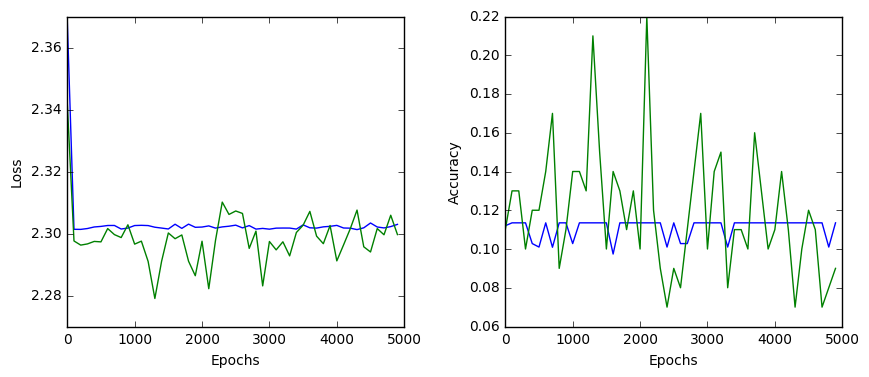

In [11]:
ax1.plot(range(0, EPOCHS, ROUNDS), losses, label='test')
ax1.plot(range(0, EPOCHS, ROUNDS), train_losses, label='train')
ax2.plot(range(0, EPOCHS, ROUNDS), accuracies, label='test')
ax2.plot(range(0, EPOCHS, ROUNDS), train_accuracies, label='train')
plt.show()

# Training with AdamOptimizer

In [14]:
train()

step 0, training accuracy 0.3
test accuracy 0.1462
test loss 2.57468
step 100, training accuracy 0.97
test accuracy 0.9395
test loss 0.20743
step 200, training accuracy 0.95
test accuracy 0.9636
test loss 0.11321
step 300, training accuracy 0.93
test accuracy 0.9663
test loss 0.108973
step 400, training accuracy 0.99
test accuracy 0.9741
test loss 0.0802373
step 500, training accuracy 0.99
test accuracy 0.9758
test loss 0.0721159
step 600, training accuracy 0.99
test accuracy 0.9795
test loss 0.0595147
step 700, training accuracy 0.98
test accuracy 0.9814
test loss 0.0562387
step 800, training accuracy 0.98
test accuracy 0.9759
test loss 0.0727712
step 900, training accuracy 0.98
test accuracy 0.9815
test loss 0.0580353
step 1000, training accuracy 0.97
test accuracy 0.9747
test loss 0.0793398
step 1100, training accuracy 1
test accuracy 0.9796
test loss 0.0627363
step 1200, training accuracy 1
test accuracy 0.9849
test loss 0.0459188
step 1300, training accuracy 1
test accuracy 0.9828

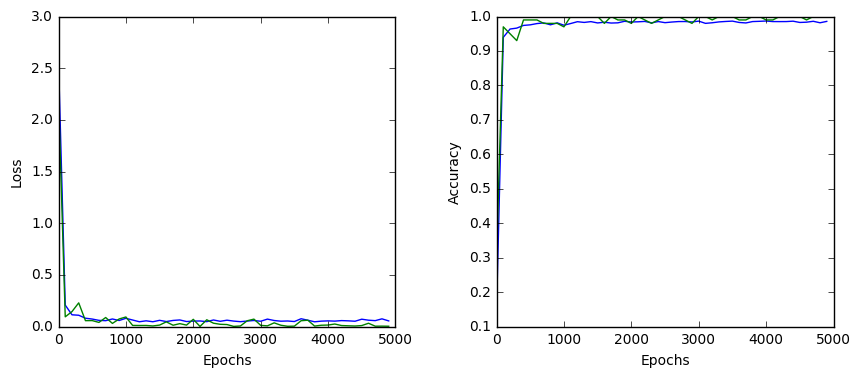

In [15]:
ax1.plot(range(0, EPOCHS, ROUNDS), losses, label='test')
ax1.plot(range(0, EPOCHS, ROUNDS), train_losses, label='train')
ax2.plot(range(0, EPOCHS, ROUNDS), accuracies, label='test')
ax2.plot(range(0, EPOCHS, ROUNDS), train_accuracies, label='train')
plt.show()

# Adding learning decay

In [16]:
DECAY_STEP = 1000
GLOBAL_STEP = tf.Variable(0, trainable=False)
DECAY_RATE = 0.75
LR = 0.1
# decayed_learning_rate = learning_rate * decay_rate ^ (global_step / decay_steps)
learning_rate = tf.train.exponential_decay(LR, GLOBAL_STEP, DECAY_STEP, DECAY_RATE, staircase=True)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy, global_step=GLOBAL_STEP)

In [17]:
# initialize
EPOCHS = 5000
ROUNDS = 100
BATCH_SIZE = 100
accuracies = []
losses = []
train_accuracies = []
train_losses = []
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=.3)
fig.set_size_inches(10, 4)
ax1.set_ylabel("Loss")
ax1.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Epochs")

init = tf.initialize_all_variables() 
sess = tf.Session()
sess.run(init)

In [18]:
train()

step 0, training accuracy 0.16
test accuracy 0.1028
test loss 348.654
step 100, training accuracy 0.62
test accuracy 0.6125
test loss 1.17855
step 200, training accuracy 0.75
test accuracy 0.7002
test loss 0.904514
step 300, training accuracy 0.7
test accuracy 0.6885
test loss 0.927616
step 400, training accuracy 0.83
test accuracy 0.7783
test loss 0.670575
step 500, training accuracy 0.81
test accuracy 0.7858
test loss 0.708107
step 600, training accuracy 0.76
test accuracy 0.8135
test loss 0.613083
step 700, training accuracy 0.84
test accuracy 0.8188
test loss 0.562012
step 800, training accuracy 0.87
test accuracy 0.8481
test loss 0.480448
step 900, training accuracy 0.82
test accuracy 0.8323
test loss 0.537867
step 1000, training accuracy 0.83
test accuracy 0.8466
test loss 0.482901
step 1100, training accuracy 0.89
test accuracy 0.8677
test loss 0.421461
step 1200, training accuracy 0.8
test accuracy 0.8747
test loss 0.409236
step 1300, training accuracy 0.91
test accuracy 0.8926

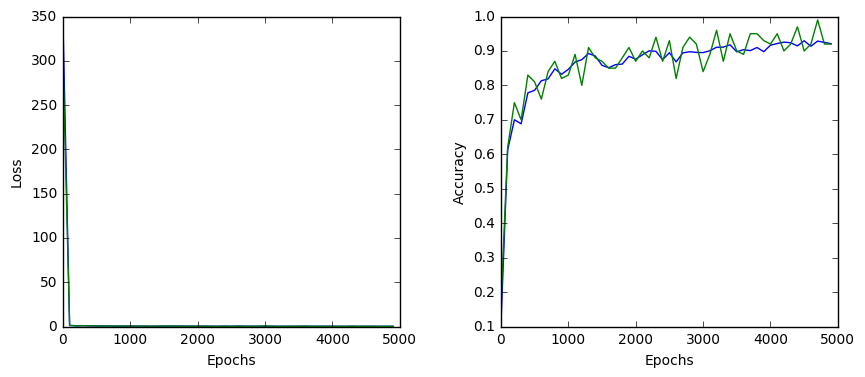

In [19]:
ax1.plot(range(0, EPOCHS, ROUNDS), losses, label='test')
ax1.plot(range(0, EPOCHS, ROUNDS), train_losses, label='train')
ax2.plot(range(0, EPOCHS, ROUNDS), accuracies, label='test')
ax2.plot(range(0, EPOCHS, ROUNDS), train_accuracies, label='train')
plt.show()

# Adding dropout

In [20]:
# 1. Define Variables and Placeholders
X = tf.placeholder(tf.float32, [None, 784])
Y_ = tf.placeholder(tf.float32, [None, 10])
x_image = tf.reshape(X, [-1,28,28,1])
pkeep = tf.placeholder(tf.float32)

# Convolutional layer 1
W1 = tf.Variable(tf.truncated_normal([5, 5, 1, 4], stddev=0.1))
B1 = tf.Variable(tf.constant(0.1, shape=[4]))
Y1 = tf.nn.relu(tf.nn.conv2d(x_image, W1, strides=[1, 1, 1, 1], padding='SAME') + B1)
Y1_drop = tf.nn.dropout(Y1, pkeep)

# Convolutional layer 2
W2 = tf.Variable(tf.truncated_normal([5, 5, 4, 8], stddev=0.1))
B2 = tf.Variable(tf.constant(0.1, shape=[8]))
Y2 = tf.nn.relu(tf.nn.conv2d(Y1_drop, W2, strides=[1, 2, 2, 1], padding='SAME') + B2)
Y2_drop = tf.nn.dropout(Y2, pkeep)
                 
# Convolutional layer 3
W3 = tf.Variable(tf.truncated_normal([4, 4, 8, 12], stddev=0.1))
B3 = tf.Variable(tf.constant(0.1, shape=[12]))
Y3 = tf.nn.relu(tf.nn.conv2d(Y2_drop, W3, strides=[1, 2, 2, 1], padding='SAME') + B3)
Y3_drop = tf.nn.dropout(Y3, pkeep)

# Dense layer
W = tf.Variable(tf.truncated_normal([7*7*12, 200], stddev=0.1))
B = tf.Variable(tf.constant(0.1, shape=[200]))
Y3_flat = tf.reshape(Y3_drop, [-1, 7*7*12])
Y_fc1 = tf.nn.relu(tf.matmul(Y3_flat, W) + B)
Y_drop = tf.nn.dropout(Y_fc1, pkeep)

# Readout layer
W_fc2 = tf.Variable(tf.truncated_normal([200, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
Y_conv = tf.matmul(Y_fc1, W_fc2) + b_fc2
Y = tf.nn.softmax(Y_conv)

In [21]:
# 3. Define the loss function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(Y_conv, Y_) # calculate cross-entropy with logits
cross_entropy = tf.reduce_mean(cross_entropy)

In [22]:
# 4. Define the accuracy
correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [23]:
# 5. Train with an Optimizer
train_step = tf.train.AdamOptimizer(0.005).minimize(cross_entropy)
#train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [24]:
# initialize
EPOCHS = 5000
ROUNDS = 100
BATCH_SIZE = 100
accuracies = []
losses = []
train_accuracies = []
train_losses = []
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=.3)
fig.set_size_inches(10, 4)
ax1.set_ylabel("Loss")
ax1.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Epochs")

init = tf.initialize_all_variables() 
sess = tf.Session()
sess.run(init)

In [25]:
for i in range(EPOCHS):
      batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
      sess.run(train_step,feed_dict={X: batch_xs, Y_: batch_ys, pkeep:0.5})
      if (i % ROUNDS == 0):
        train_accuracy, train_loss = sess.run([accuracy, cross_entropy], feed_dict={X:batch_xs, Y_: batch_ys, pkeep:0.5})
        print("step %d, training accuracy %g"%(i, train_accuracy))
        test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images, Y_: mnist.test.labels, pkeep:1.0})
        print("test accuracy %g"%test_accuracy)
        test_loss = sess.run(cross_entropy, feed_dict={X: mnist.test.images, Y_: mnist.test.labels,pkeep:1.0})
        print("test loss %g"%test_loss)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        losses.append(test_loss)
        accuracies.append(test_accuracy)

step 0, training accuracy 0.11
test accuracy 0.1236
test loss 2.36707
step 100, training accuracy 0.85
test accuracy 0.9232
test loss 0.260824
step 200, training accuracy 0.87
test accuracy 0.9481
test loss 0.172923
step 300, training accuracy 0.89
test accuracy 0.9526
test loss 0.152307
step 400, training accuracy 0.88
test accuracy 0.9541
test loss 0.146422
step 500, training accuracy 0.92
test accuracy 0.9666
test loss 0.113363
step 600, training accuracy 0.91
test accuracy 0.9624
test loss 0.116653
step 700, training accuracy 0.94
test accuracy 0.9651
test loss 0.102862
step 800, training accuracy 0.95
test accuracy 0.9708
test loss 0.0903265
step 900, training accuracy 0.94
test accuracy 0.9698
test loss 0.0931312
step 1000, training accuracy 0.97
test accuracy 0.9699
test loss 0.0903257
step 1100, training accuracy 0.92
test accuracy 0.9698
test loss 0.0932685
step 1200, training accuracy 0.94
test accuracy 0.9736
test loss 0.0902444
step 1300, training accuracy 0.96
test accurac

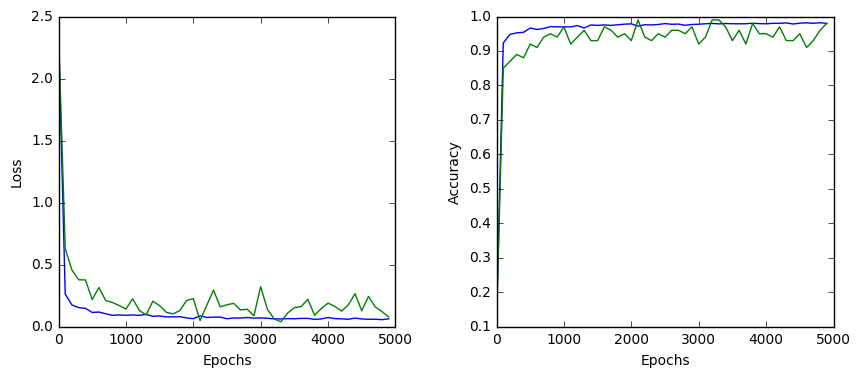

In [26]:
ax1.plot(range(0, EPOCHS, ROUNDS), losses, label='test')
ax1.plot(range(0, EPOCHS, ROUNDS), train_losses, label='train')
ax2.plot(range(0, EPOCHS, ROUNDS), accuracies, label='test')
ax2.plot(range(0, EPOCHS, ROUNDS), train_accuracies, label='train')
plt.show()